<a href="https://colab.research.google.com/github/ZackPashkin/ocr_pytorch/blob/augmentation/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22copy_ocr_pytoch%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!git clone https://github.com/ZackPashkin/ocr_pytorch

Cloning into 'ocr_pytorch'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 171 (delta 93), reused 107 (delta 36), pack-reused 0
Receiving objects: 100% (171/171), 106.13 KiB | 11.79 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [20]:
#@title Mount permanent storage
def mount_storage():
  from google.colab import auth
  import os
  auth.authenticate_user()
  !echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
  !curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
  !apt -qq update
  !apt -qq install gcsfuse
  os.makedirs("handwritten_rus",exist_ok=True)
  # bucket name only name without prefix gs:// 
  #for example if bucket name is gs://helloworld then 
  !gcsfuse handwritten_rus handwritten_rus
  #now you should be able to read/write to dir_name as for usual folder
  print("mounted to /content/mounted_storage")
mount_storage()

!ls /content/handwritten_rus

!touch /content/handwritten_rus/test.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1974  100  1974    0     0  98700      0 --:--:-- --:--:-- --:--:--  101k
OK
59 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 59 not upgraded.
Need to get 10.7 MB of archives.
After this operation, 22.9 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.32.0_amd64.deb ...
Unpacking gcsfuse (0.32.0) ...
Setting up gcsfuse (0.32.0) ...
Using mount point: /content/handwritten_rus
Opening GCS connection...
Mounting file system...
File system has been successfully mounted.
mounted to /content/mounted_storage
Arina.zip			 HANDWRITTEN.zip	     s_kuchuganova.zip
captc

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
! pip3 install -r /content/ocr_pytorch/requirements.txt


     |████████████████████████████████| 81kB 5.2MB/s 
     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 36.7MB 1.2MB/s 
     |████████████████████████████████| 952kB 47.5MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60963 sha256=24dda8b32b32ef39889cbfed59161209fec988bc6b3f8f4abbe0c2305f3a45d6
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [23]:

!wget https://storage.googleapis.com/handwritten_rus/LABELED/assignments_from_pool_601263__05-12-2020.tsv
!wget https://storage.googleapis.com/handwritten_rus/LABELED/assignments_from_pool_615470__05-12-2020.tsv
!wget https://storage.googleapis.com/handwritten_rus/HANDWRITTEN.zip
!unzip /content/handwritten_rus/HANDWRITTEN.zip 

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/2312.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/2313.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/2314.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/2315.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/2316.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/2317.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/2318.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/2319.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/232.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/2320.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/2321.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/2322.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/2323.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120/2324.jpg  
  inflating: HANDWRITTEN/kovshov_4461_part_1_261120

In [24]:
## UPDATE: un

## UPDATE: unzip loaded from yandex disk file

## UPDATE: now keys in dict is full path to image

In [25]:
import os
import pandas as pd

df_part1 = pd.read_csv("/content/handwritten_rus/LABELED/assignments_from_pool_601263__05-12-2020.tsv", delimiter='\t' )
df_part2 = pd.read_csv("/content/handwritten_rus/LABELED/assignments_from_pool_615470__05-12-2020.tsv", delimiter='\t' )
df = df_part1.append(df_part2, ignore_index=True)
df = df.dropna(subset=['INPUT:image', 'OUTPUT:output'])

labels_dict = {}
for image_name in os.listdir("/content/HANDWRITTEN/werner_1000_part_1_181120"):
  label = df.loc[df["INPUT:image"] == "".join(("/HANDWRITTEN/werner_1000_part_1_181120/", image_name)), "OUTPUT:output"]
  label = label.tolist()
  if label != []: 
    labels_dict.update({'/content/HANDWRITTEN/werner_1000_part_1_181120/' + image_name:label[0]})

for image_name in os.listdir("/content/HANDWRITTEN/werner_1001_2000_part_2_241120"):
  label = df.loc[df["INPUT:image"] == "".join(("/HANDWRITTEN/werner_1001_2000_part_2_241120/", image_name)), "OUTPUT:output"]
  label = label.tolist()
  if label != []: 
    labels_dict.update({"/content/HANDWRITTEN/werner_1001_2000_part_2_241120/" + image_name:label[0]})
labels_dict


{'/content/HANDWRITTEN/werner_1000_part_1_181120/503.png': '28.10.2016',
 '/content/HANDWRITTEN/werner_1000_part_1_181120/26.png': '1) титульный лист',
 '/content/HANDWRITTEN/werner_1000_part_1_181120/300.png': 'межмуниципальный отдел',
 '/content/HANDWRITTEN/werner_1000_part_1_181120/789.png': 'Заявление',
 '/content/HANDWRITTEN/werner_1000_part_1_181120/675.png': 'по словам',
 '/content/HANDWRITTEN/werner_1000_part_1_181120/912.png': '( ковариация)',
 '/content/HANDWRITTEN/werner_1000_part_1_181120/703.png': 'Заявление',
 '/content/HANDWRITTEN/werner_1000_part_1_181120/169.png': '23.03.2012 г.',
 '/content/HANDWRITTEN/werner_1000_part_1_181120/781.png': 'собственноручно.',
 '/content/HANDWRITTEN/werner_1000_part_1_181120/131.png': 'преступление.',
 '/content/HANDWRITTEN/werner_1000_part_1_181120/994.png': '01.01.1992',
 '/content/HANDWRITTEN/werner_1000_part_1_181120/616.png': 'Доверенность',
 '/content/HANDWRITTEN/werner_1000_part_1_181120/138.png': 'в зависимости от',
 '/content/HA

In [26]:
(np.array(files_from_dir)).isnan()

NameError: ignored

In [ ]:
len(labels_dict.keys())

Ермаков Любомир Иванович


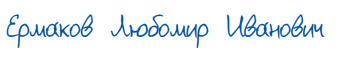

In [27]:
from PIL import Image
import random
i = random.choice(range(len(labels_dict)))
im = Image.open(list(labels_dict.keys())[i])

print(list(labels_dict.values())[i])
im

In [28]:
import sys
#sys.path.append("/content/ocr_pytorch/src")
#from config import *
#from dataset import *
#from train import *
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

## UPDATE: IMAGES=LABELS_DICT_KEYS

In [29]:
import glob
import os
from sklearn import preprocessing
import numpy as np


DATASET_PATH = "/content/HANDWRITTEN/werner_1000_part_1_181120/"
BATCH_SIZE = 32
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
NUM_WORKERS = 4
EPOCHS = 201
DEVICE = 'cuda'


#IMAGES = glob.glob(os.path.join(DATASET_PATH, "*.png"))
LABELS_DICT_KEYS = list(labels_dict.keys())
IMAGES=LABELS_DICT_KEYS#[DATASET_PATH + x for x in LABELS_DICT_KEYS]
# to look like '6bnnm'
#LABELS_NAMES = [x.split('/')[-1][:-4] for x in IMAGES]
LABELS_NAMES =list(labels_dict.values())
# to look like ['g', 'p', 'x', 'n', 'g']
LABELS_NAMES = [[_ for _ in x] for x in LABELS_NAMES]
LABELS_NAMES_FLAT = [_ for sublist in LABELS_NAMES for _ in sublist]
labels_encoded = preprocessing.LabelEncoder()
labels_encoded.fit(LABELS_NAMES_FLAT)
# print(labels_encoded.classes_)
# keep 0 for unknown
LABELS_ENCODED = np.array([labels_encoded.transform(x) for x in LABELS_NAMES]) +1
#print(LABELS_ENCODED)
#print(len(labels_encoded.classes_))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [30]:
import torchvision.models as models

In [31]:
mobilenet = models.mobilenet_v2()
mobilenet

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

## UPDATE: try to extend max_label lenght (#torch.Size(np.array(max(labels)) + 7) #max(labels))

In [32]:
class SynthCollator(object):
    
    def __call__(self, batch):
        #width = [item['images'].shape[2] for item in batch]
        labels = [item['labels'].shape for item in batch]
        max_label_lenght = max(labels) #torch.Size(np.array(max(labels)) + 7) #max(labels)
        for item in batch:
          target = torch.zeros(max_label_lenght)
          source_lenght = list(item['labels'].shape)[0]
          target[:source_lenght]=item['labels']
          item['labels']=target
        imgs = [item['images'] for item in batch]
        labels = [item['labels'] for item in batch]
        input_lenght = np.asarray([item['input_lenght'] for item in batch])
        input_lenght = torch.Tensor(input_lenght)
        imgs=torch.stack(imgs)
        labels = torch.stack(labels)
        item={'images':imgs,'labels': labels, 'input_lenght': input_lenght}
        return item

In [34]:
import torch 
import numpy as np
from albumentations import *

from PIL import Image

class OcrDataset: 
    """
    Handle images for dataloader.
    Apply resize and augmentations.
    Put attention to resize PIL: first goes width then height
    """
    
    def __init__(self, image_path, labels, resize=None):
       self.image_path = image_path
       self.labels = labels
       self.resize = resize
       self.augmentations = Compose([
           Normalize(always_apply=True),
            OneOf([
               RandomBrightness(limit=0.8, p=0.7),
               RandomContrast(limit=0.8, p=0.7),
               RandomBrightnessContrast(p=0.5),
               RandomGamma(gamma_limit=(80, 300), p=0.7),
               CLAHE(p=1),
           ]),
               OneOf([
                   ToSepia(p=1),
                    ToGray(p=1),
               ]),
           ])

            
    def __len__(self):
        return len(self.image_path)
        
    def __getitem__(self, item):
        image = Image.open(self.image_path[item]).convert('RGB')
        labels = self.labels[item]
        
        if self.resize is not None:
            image = image.resize((self.resize[1], self.resize[0]), resample=Image.BILINEAR)
            
        
        image = np.array(image)
        augmented_image = self.augmentations(image=image)
        image = augmented_image["image"]
        image = np.transpose(image,(2,0,1)).astype(np.float32)
        
        return {
            "images": torch.tensor(image, dtype=torch.float),
            "labels": torch.tensor(labels, dtype=torch.long),
            "input_lenght": len(labels)
        }

In [35]:
from sklearn import model_selection
(
    train_img,
    test_img, 
    train_labels, 
    test_labels, 
    train_orig_labels, 
    test_orig_targets,
)   =model_selection.train_test_split(
        IMAGES, LABELS_ENCODED, LABELS_NAMES, test_size=0.1, random_state=2020)

train_dataset = OcrDataset(image_path=train_img, 
                            labels=train_labels, 
                            resize=(IMAGE_HEIGHT,IMAGE_WIDTH)
                          )

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True,
    collate_fn = SynthCollator()
)


test_dataset = OcrDataset(image_path=test_img, 
                            labels=test_labels, 
                            resize=(IMAGE_HEIGHT,IMAGE_WIDTH)
                          )

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False,
    collate_fn = SynthCollator()
)

In [36]:
a = next(iter(train_loader))
a['images'][0].size()


/usr/local/lib/python3.6/dist-packages/albumentations/augmentations/functional.py:1304: RuntimeWarning: invalid value encountered in power
  img = np.power(img, gamma)
/usr/local/lib/python3.6/dist-packages/albumentations/augmentations/functional.py:1304: RuntimeWarning: invalid value encountered in power
  img = np.power(img, gamma)
/usr/local/lib/python3.6/dist-packages/albumentations/augmentations/functional.py:1304: RuntimeWarning: invalid value encountered in power
  img = np.power(img, gamma)


TypeError: ignored

In [37]:
train_dataset.__getitem__(32)

{'images': tensor([[[2.2147, 2.2147, 2.1975,  ..., 2.2318, 2.2147, 2.2147],
          [2.2147, 2.2147, 2.1975,  ..., 2.2318, 2.2147, 2.2147],
          [2.2147, 2.2147, 2.1975,  ..., 2.2318, 2.2147, 2.2147],
          ...,
          [2.0434, 2.0434, 2.0605,  ..., 1.4612, 1.4612, 1.4612],
          [2.0777, 2.0777, 2.0948,  ..., 1.4269, 1.4269, 1.4269],
          [2.0777, 2.0777, 2.0948,  ..., 1.4269, 1.4269, 1.4269]],
 
         [[2.4111, 2.4111, 2.4111,  ..., 2.3761, 2.3936, 2.3936],
          [2.4111, 2.4111, 2.4111,  ..., 2.3761, 2.3936, 2.3936],
          [2.4111, 2.4111, 2.4111,  ..., 2.3761, 2.3936, 2.3936],
          ...,
          [2.2535, 2.2535, 2.2360,  ..., 1.7283, 1.7458, 1.7458],
          [2.2885, 2.2885, 2.2710,  ..., 1.6933, 1.7108, 1.7108],
          [2.2885, 2.2885, 2.2710,  ..., 1.6933, 1.7108, 1.7108]],
 
         [[2.5877, 2.5877, 2.6051,  ..., 2.6051, 2.6051, 2.6051],
          [2.5877, 2.5877, 2.6051,  ..., 2.6051, 2.6051, 2.6051],
          [2.5877, 2.5877, 2.6

In [38]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torchvision import models



class OcrModel_v0(nn.Module):
    def __init__(self, num_characters):
        super(OcrModel_v0, self).__init__()
        mobilenet = models.mobilenet_v2()
        self.mobilenet_feature_extractor = nn.Sequential(*list(mobilenet.children())[:-1])
        self.linear1 = nn.Linear(1280, 64)
        self.dropout1  = nn.Dropout(0.2)
        self.gru = nn.GRU(64, 32 , bidirectional=True,
                          num_layers=2,
                          dropout=0.25,
                          batch_first=True)
        self.output = nn.Linear(64, num_characters + 1)
        
    def forward(self, images,input_lenght, labels=None):
        bs, c, h, w = images.size()
        out = F.relu(self.mobilenet_feature_extractor(images))# 32 1280 7 7
        print(out.size(), 'после бб')

        x = out.permute(0,3,1,2) #32 7 1280 7
        print(x.size())
        x = torch.reshape(x,(bs, 7*7, 1280))#32 49 1280
        #print(x.size())
        x = self.linear1(x)
        x = self.dropout1(x)
        print(x.size(), 'перед gru')


        x, _ = self.gru(x)
        #print(x.size())
        x = self.output(x)
        #print(x.size())
        # permute again 
        x = x.permute(1,0,2)
        #print(x.size())
        if labels is not None: 
            log_softmax_values =  F.log_softmax(x,2)   
            input_lenghts = torch.full(size=(bs,),
                                      fill_value=log_softmax_values.size(0), 
                                       dtype = torch.int32
                                       )
             #print(input_lenghts)

            
            output_lenghts =input_lenght.long()
             #print(output_lenghts)
            
            loss = nn.CTCLoss(blank=0, zero_infinity = True)(
                log_softmax_values,
                labels,
                input_lenghts,
                output_lenghts)
            

            return x, loss

In [39]:
int(torch.Tensor(a['input_lenght'])[0])

NameError: ignored

In [40]:
np.asarray([int(x) for x in a['input_lenght']])

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f35690c5fd0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 47, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 911, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.6/selectors.py", line 376, in select
    fd_event_list = self._poll.poll(timeout)
KeyboardInterrupt: 


NameError: ignored

In [41]:
model = OcrModel_v0(num_characters=len(labels_encoded.classes_)+1)
model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
optimizer, factor=0.8, patience=2, verbose=True)
with torch.no_grad():   
    model.forward(a['images'].to(DEVICE),a['input_lenght'])

RuntimeError: ignored

In [42]:
from tqdm import tqdm
import torch

def train(model, dataloader, optimizer):
    model.train()
    final_loss = 0
    #tracker = tqdm(dataloader, total=len(dataloader))
    for data in dataloader:
        for key, value in data.items():
            data[key] = value.to(DEVICE)
        optimizer.zero_grad()
        _, loss = model(**data)
        loss.backward()
        optimizer.step()
        final_loss += loss.item()
    return final_loss / len(dataloader)
    

def evaluate(model, dataloader):
    model.eval()
    final_loss = 0
    final_predictions = []
    #tracker = tqdm(dataloader, total=len(dataloader))
    # if you have out of memory error put torch.no_grad()
    with torch.no_grad():
        for data in dataloader:
            for key, value in data.items():
                data[key] = value.to(DEVICE)
            batch_predictions, loss = model(**data)
            final_predictions.append(batch_predictions)
            final_loss += loss.item()
        return final_predictions, final_loss / len(dataloader)
        
            

In [43]:
import torch




def decode_preds(preds, encoder):
    preds = preds.permute(1,0,2)
    preds = torch.softmax(preds,2)
    preds = torch.argmax(preds,2)
    preds = preds.detach().cpu().numpy()
    preds_list  = []
    for i in range(preds.shape[0]):
        tmp = []
        for j in preds[i,:]:
            j = j-1
            if j == -1:
                tmp.append("*")
            else:
                tmp.append(encoder.inverse_transform([j])[0])
        element = "".join(tmp)
        preds_list.append(element)
    return preds_list

In [ ]:
model = OcrModel_v0(num_characters=len(labels_encoded.classes_))
model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
optimizer, factor=0.8, patience=2, verbose=True
    )
    
for epoch in range(EPOCHS):
  train_loss = train(model, train_loader, optimizer)
  valid_preds, valid_loss = evaluate(model, test_loader)
  valid_final_preds = []
  
  for pred in valid_preds:
      #print(pred)
      cur_preds = decode_preds(pred, labels_encoded)
      valid_final_preds.extend(cur_preds)
  show_preds_list = list(zip(test_orig_targets, valid_final_preds))[1:3]
  print(*show_preds_list, sep='\n')
  pprint("-"*90)
  pprint(f"Epoch: {epoch} | Train loss = {train_loss} | Valid loss = {valid_loss} |")
  pprint("-"*90)

In [ ]:
valid_final_preds

 for debbaging

In [ ]:
    history = []
    mist = []
    model = OcrModel_v0(num_characters=len(labels_encoded.classes_))
    model.to(DEVICE)
    model.train()
    dataloader = train_loader
    final_loss = 0
    tracker = tqdm(dataloader, total=len(dataloader))
    for data in dataloader:
        for key, value in data.items():
            data[key] = value.to(DEVICE)
        optimizer.zero_grad()
        _, loss = model(**data)
        loss.backward()
        optimizer.step()
        history.append(loss.item())
        if np.isinf(loss.item()):
            mist.append((data, key, value ))
        final_loss += loss.item()
    final_loss / len(dataloader)

tensor([[14.,  7.,  1., 73., 80., 75., 59., 72., 59.,  1., 74., 75., 59., 61.,
          1., 67.,  1., 76., 61., 73., 60., 73., 63.,  1., 82., 64., 70., 73.,
         61., 64., 69., 59.,  1., 67.,  1., 62., 75., 59., 65., 63., 59., 72.,
         67., 72., 59.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], is problem tensor what gives inf in ctc loss

## UPDATE  add in ctc loss parameter zero_infinity = True, what if loss is inf change this loss to 0

In [ ]:
vgg = models.vgg16_bn(pretrained=True)
vgg_feature_extractor = nn.Sequential(*list(vgg.children())[:-2],nn.Linear(512,64))
vgg_feature_extractor


In [ ]:
import torch




def decode_preds(preds, encoder):
    preds = preds.permute(1,0,2)
    preds = torch.softmax(preds,2)
    preds = torch.argmax(preds,2)
    preds = preds.detach().cpu().numpy()
    preds_list  = []
    for i in range(preds.shape[0]):
        tmp = []
        for j in preds[i,:]:
            j = j-1
            if j == -1:
                tmp.append("*")
            else:
                tmp.append(encoder.inverse_transform([j])[0])
        element = "".join(tmp)
        preds_list.append(element)
    return preds_list